In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import math

## Zadanie 1

In [2]:
#Generator liczb pseudolosowych
n_samples = 100
rand = np.random.uniform(0,1,n_samples)

Rozkład jednorodny na przedziale <a,b>

In [3]:
def jednorodny(a=0,b=1):
    x = np.random.uniform(0,1)
    z = ((b-a)*x+a)
    return z

Rozkład wykładniczy p(x)

In [4]:
def wykladniczy(lamb=1):
    x = np.random.uniform(0,1)
    z = (1/lamb)*math.log(1/(1-x))
    return z

Rozkład normalny N(0,1) (metoda Boxa-Mullera)

In [5]:
def normalnyBM():
    u1 = np.random.uniform(0,1)
    u2 = np.random.uniform(0,1)
    while (u1 == 0):
        u1 = np.random.uniform(0,1)
    sq = math.sqrt(-2*math.log(u1))
    phi = 2*math.pi*u2
    z1 = sq * math.cos(phi)
    z2 = sq * math.sin(phi)
    return z1


Wyniki:

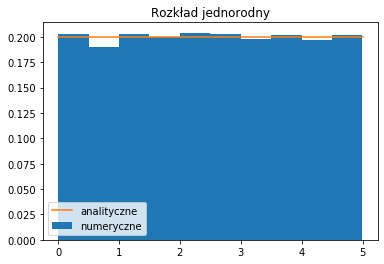

In [6]:
fig, ax = plt.subplots(1,1)
a, b = 0, 5
ax.hist([jednorodny(a,b) for x in range(10000)], density=True, label='numeryczne')
ax.set_title("Rozkład jednorodny")
X = np.linspace(a,b)
Y = [1/(b-a) for x in X]
plt.plot(X,Y, label='analityczne')
plt.legend()
plt.show()

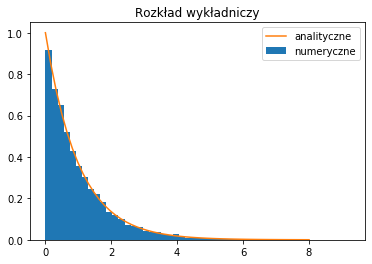

In [7]:
fig, ax = plt.subplots(1,1)
ax.hist([wykladniczy() for x in range (10000)], bins=50, density=True, label='numeryczne')
ax.set_title("Rozkład wykładniczy")
X = np.linspace(0,8)
Y = [1*math.pow(math.e,(-1*x)) for x in X]
plt.plot(X,Y, label='analityczne')
plt.legend()
plt.show()

In [8]:
#wzór rozkład normalny
def normalnyWzor(x,sigma=1,mi=0):
    power = -(math.pow((x-mi),2))/(2*math.pow(sigma,2))
    podst = 1/(sigma*math.sqrt(2*math.pi))
    return podst*math.pow(math.e,power)

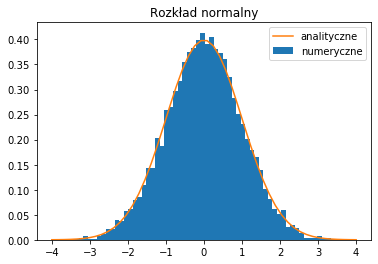

In [9]:
fig, ax = plt.subplots(1,1)
ax.hist([normalnyBM() for x in range (10000)], bins=65, density=True, label='numeryczne')
ax.set_title("Rozkład normalny")
X = np.linspace(-4, 4)
Y = [normalnyWzor(x) for x in X]
plt.plot(X,Y, label='analityczne')
plt.legend()
plt.show()

## Zadanie 2

dla $ p \ne q $ 

$r^{A}_{a} = \frac{(\frac{q}{p})^{a} - (\frac{q}{p})^{z}}{1-(\frac{q}{p})^{z}} = \frac{1-(\frac{p}{q})^{b}}{1-(\frac{p}{q})^{z}}$

dla  $ p = q = \frac{1}{2} $

$r^{A}_{a} = \frac{b}{z} $

## Zadanie 3

In [10]:
def rzut(a,b,p):
    x = jednorodny(0,1)
    if(x > p):
        return (a-1, b+1)
    return (a+1, b-1)

In [11]:
def gra(a,b,p):
    while(a > 0 and b > 0):
        a, b = rzut(a,b,p)
    return (a,b)

In [12]:
def rozgrywka(iloscGier,a,b,p):
    wygranaA = [0]*iloscGier
    wygranaB = [0]*iloscGier
    kapKonA = [a]
    kapKonB = [b]
    for i in range(iloscGier):
        k_a, k_b = gra(a,b,p)
        if(k_a > k_b):
            wygranaA[i] = wygranaA[i-1] + 1
            wygranaB[i] = wygranaB[i-1]
            kapKonA.append(kapKonA[-1]+b)
            kapKonB.append(kapKonB[-1]-b)
        else:
            wygranaB[i] = wygranaB[i-1] + 1
            wygranaA[i] = wygranaA[i-1]
            kapKonB.append(kapKonB[-1]+a)
            kapKonA.append(kapKonA[-1]-a)
    return (kapKonA, kapKonB, wygranaA, wygranaB)

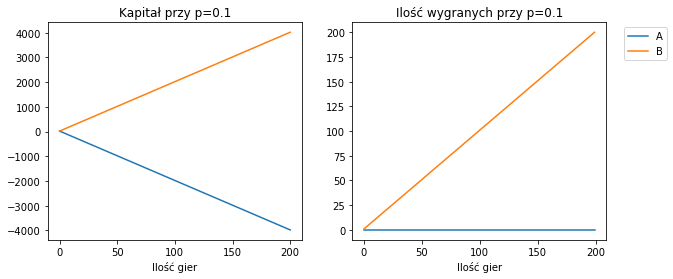

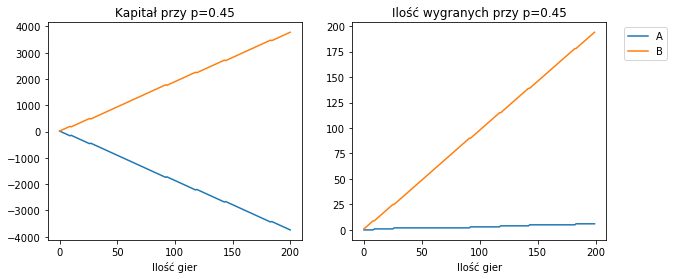

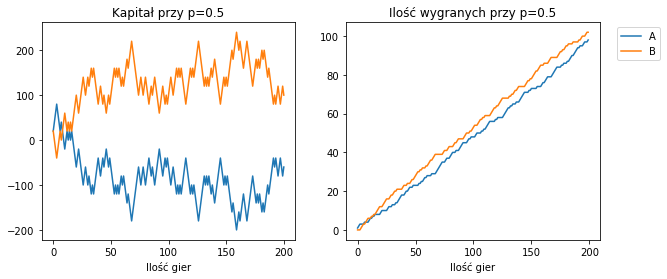

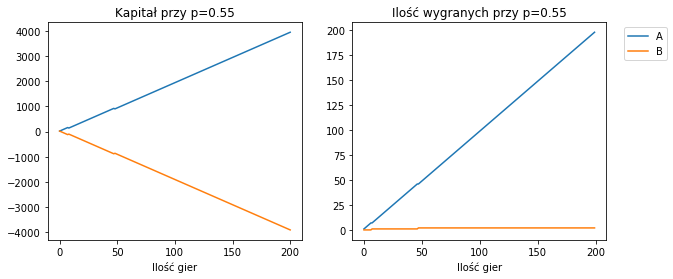

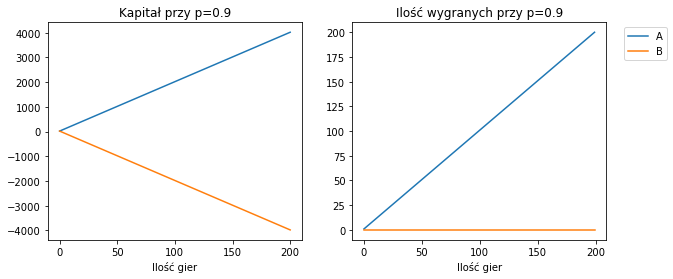

In [13]:
p = [0.1, 0.45, 0.5, 0.55, 0.9]
aKon = list()
bKon = list()
wygranaA = list()
wygranaB = list()
for i in p:
    aKon, bKon, wygranaA, wygranaB = rozgrywka(200,20,20,i)
    fig, axes = plt.subplots(1,2,figsize=(10, 4))
    axes[0].plot(range(201), aKon, label='A')
    axes[0].plot(range(201), bKon, label='B')
    axes[0].set_title('Kapitał przy p={}'.format(i))
    axes[0].set_xlabel('Ilość gier')
    axes[1].plot(wygranaA, label='A')
    axes[1].plot(wygranaB, label='B')
    axes[1].set_title('Ilość wygranych przy p={}'.format(i))
    axes[1].set_xlabel('Ilość gier')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    

## Zadanie 4

In [14]:
def ruina(p,a,z=100):
    b = z - a
    q = 1 - p
    if (q == p):
         return (b/z)
    return((1-math.pow(p/q,b))/(1-math.pow(p/q,z)))

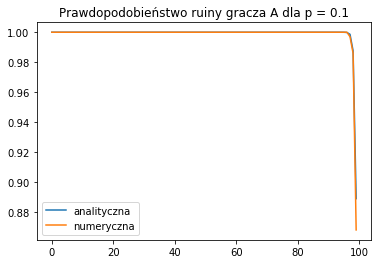

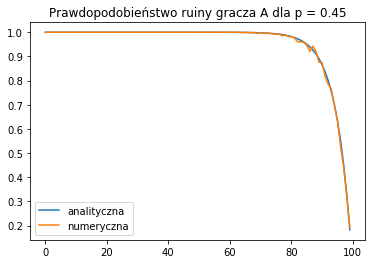

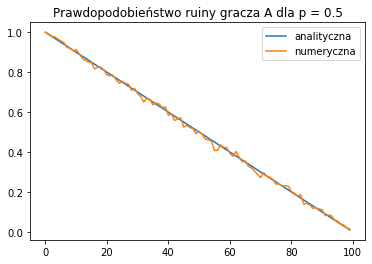

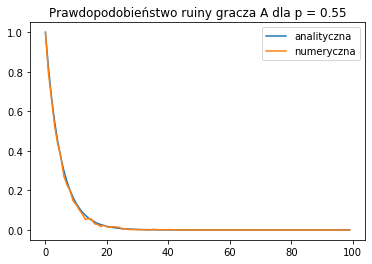

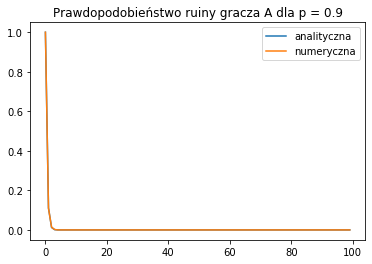

In [15]:
z = 100
p = [0.1, 0.45, 0.5, 0.55, 0.9]
iloscGier=1000
ruinaAnalityczna = dict.fromkeys(p)
ruinaNumeryczna = dict.fromkeys(p)

for i in p:
    ruinaAnalityczna[i] = []
    ruinaNumeryczna[i] = []
    for a in range(z):
        ruinaAnalityczna[i].append(ruina(i,a))
        przegA = 0
        for g in range(iloscGier):
            k_a, k_b = gra(a,z-a,i)
            if(k_a == 0):
                przegA += 1
        ruinaNumeryczna[i].append(przegA/iloscGier)
    fig, ax = plt.subplots()
    ax.plot(ruinaAnalityczna[i], label='analityczna')
    ax.plot(ruinaNumeryczna[i], label='numeryczna')
    ax.set_title('Prawdopodobieństwo ruiny gracza A dla p = {}'.format(i))
    plt.legend()
    plt.show()

## Zadanie 5

In [16]:
def ileKolejek(p,a,b):
    nrKolejki = 0
    while(a > 0 and b > 0):
        a, b = rzut(a,b,p)
        nrKolejki += 1
    return nrKolejki

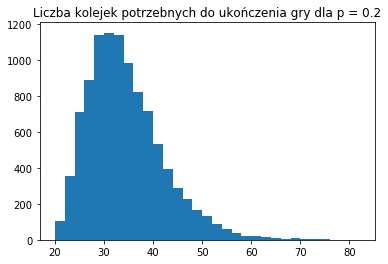

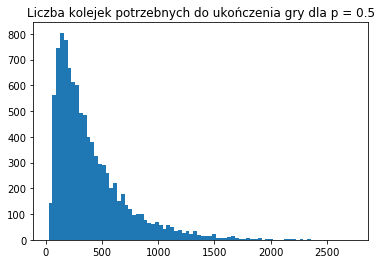

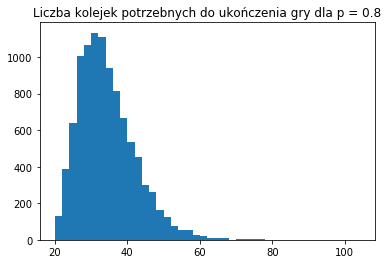

In [17]:
p = [0.2, 0.5, 0.8]
iloscGier = 10000
iloscKolejek = dict.fromkeys(p)
a=20
b=20

for i in p:
    iloscKolejek[i] = []
    for g in range(iloscGier):
        iloscKolejek[i].append(ileKolejek(i,a,b))
    bins=(max(iloscKolejek[i])-min(iloscKolejek[i]))//2
    if(bins > 80):
        bins = 80
    fig, ax = plt.subplots(1,1)
    ax.hist(iloscKolejek[i], bins=bins)
    ax.set_title('Liczba kolejek potrzebnych do ukończenia gry dla p = {}'.format(i))
    plt.show()


## Zadanie 6*

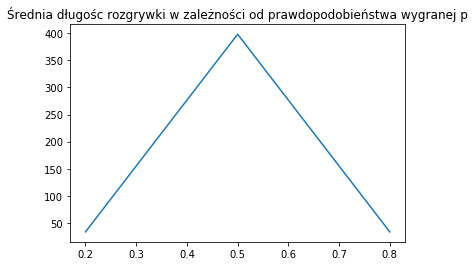

Maksimum: 398.1134


In [18]:
p = [0.2, 0.5, 0.8]
fig.ax = plt.subplots()
av = []
for i in p:
    av.append(np.average(iloscKolejek[i]))
plt.plot(p, av)
plt.title("Średnia długośc rozgrywki w zależności od prawdopodobieństwa wygranej p")
plt.show()

maximum = np.amax(av)
print('Maksimum: {}'.format(maximum))

In [19]:
p = np.linspace(0.2, 0.8)
iloscGier = 10000
iloscKolejek2 = dict.fromkeys(p)
a=20
b=20

for i in p:
    iloscKolejek2[i] = []
    for g in range(iloscGier):
        iloscKolejek2[i].append(ileKolejek(i,a,b))

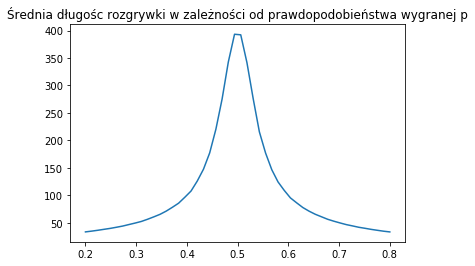

Maksimum: 393.3162


In [22]:
p = np.linspace(0.2, 0.8)
fig.ax = plt.subplots()
av2 = []
for i in p:
    av2.append(np.average(iloscKolejek2[i]))
plt.plot(p, av2)
plt.title("Średnia długośc rozgrywki w zależności od prawdopodobieństwa wygranej p")
plt.show()

maximum = np.amax(av2)
print('Maksimum: {}'.format(maximum))

## Zadanie 7*

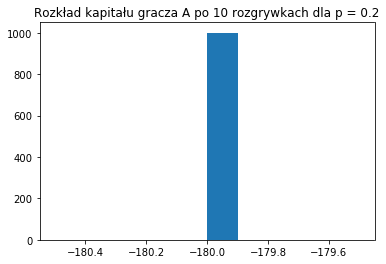

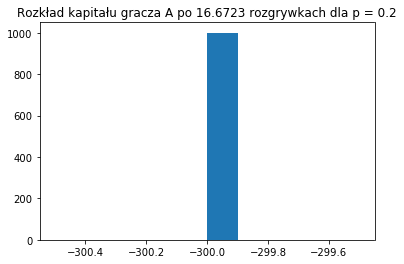

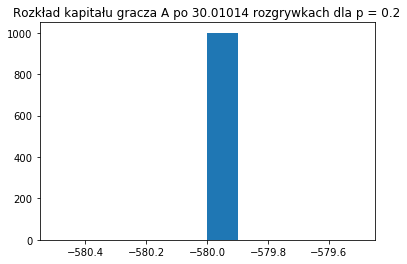

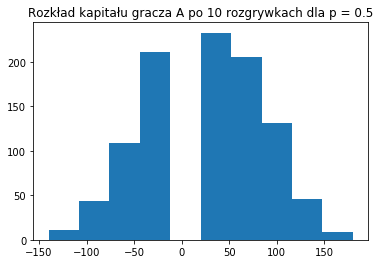

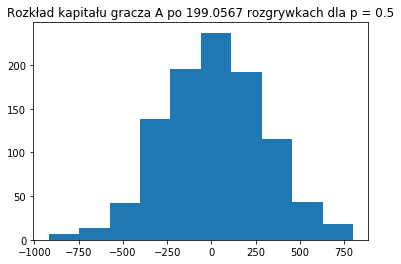

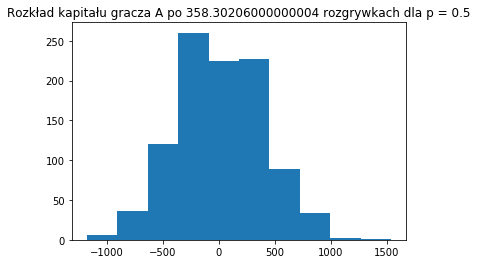

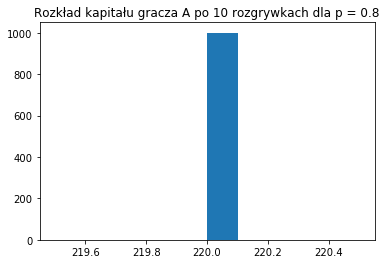

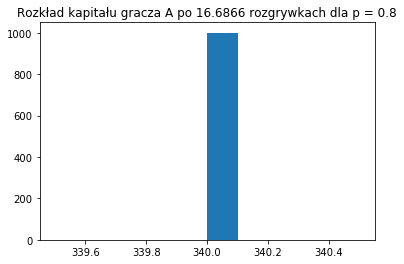

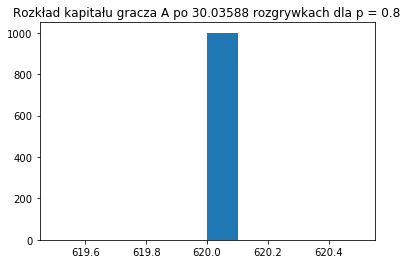

In [73]:
n = [10, 0.5, 0.9]
P = [0.2, 0.5, 0.8]
a = 20
b = 20
n_samples = 1000

for p in P:  
    for j in n:
        kapital_samples = []
        avg = 1 if j == 10 else np.average(iloscKolejek[p])
        n_rozgrywek = j * avg
        for sample in range(n_samples):
            kapital_koncowy_a = a
            for g in range(int(n_rozgrywek)):
                k_a, k_b = gra(a,b,p)
                if(k_a > k_b):
                    kapital_koncowy_a += b
                else:
                    kapital_koncowy_a -= a 
            kapital_samples.append(kapital_koncowy_a)
        fig.ax = plt.subplots()
        plt.hist(kapital_samples)
        plt.title("Rozkład kapitału gracza A po {} rozgrywkach dla p = {}".format(n_rozgrywek, p))
        plt.show()

## Zadanie 8

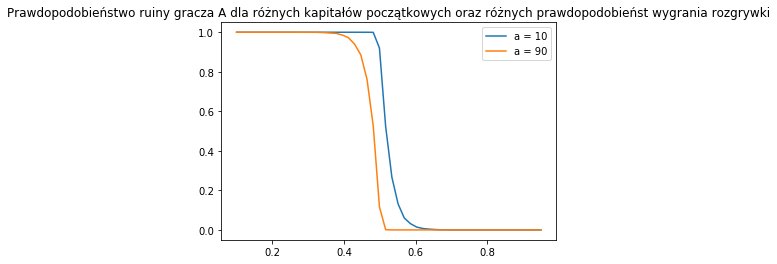

In [24]:
p = np.linspace(0.1, 0.95)
iloscGier=10000
z = 100
kapitaly = [10, 90]
ruinaNumeryczna = dict.fromkeys(p)

for a in kapitaly:
    ruinaNumeryczna[a] = []
    for i in p:
        przegA = 0
        for g in range(iloscGier):
            k_a, k_b = gra(a,z-a,i)
            if(k_a == 0):
                przegA += 1
        ruinaNumeryczna[a].append(przegA/iloscGier)
fig, ax = plt.subplots()
ax.plot(p, ruinaNumeryczna[kapitaly[0]], label='a = {}'.format(kapitaly[0]))
ax.plot(p, ruinaNumeryczna[kapitaly[1]], label='a = {}'.format(kapitaly[1]))
ax.set_title('Prawdopodobieństwo ruiny gracza A dla różnych kapitałów początkowych oraz różnych prawdopodobieńst wygrania rozgrywki')
plt.legend()
plt.show()
